In [3]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
data,target = make_blobs(n_samples=150,n_features=2,centers=[[0,0],[3,-1],[4,2]],cluster_std=0.8)

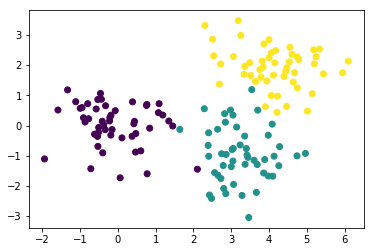

In [13]:
plt.scatter(data[:,0],data[:,1],c=target)

In [14]:
lr = LogisticRegression()
lr.fit(data,target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#设置边界
x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
y_min,y_max = data[:,1].min()-1,data[:,1].max()+1

x,y = np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01)

In [38]:
#生成表格
xx,yy = np.meshgrid(x,y)
xy_test = np.c_[xx.ravel(),yy.ravel()]
xy_predict = lr.predict(xy_test)
z = xy_predict.reshape(yy.shape)

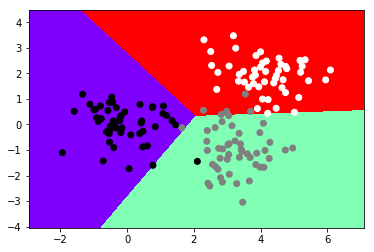

In [40]:
plt.pcolormesh(xx,yy,z,cmap="rainbow")
plt.scatter(data[:,0],data[:,1],c=target,cmap="gray")

In [51]:
data = pd.read_csv("C:\\Users\\57621\\MachineLearning\\KNN\\adult.txt",header=None)
data.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [52]:
def edu2float(edu): #任何学历返回一个数字代表
    return np.argwhere(data["education"].unique() == edu)[0,0]
def occupation2float(occupation): #任何职业返回一个数字代表
    return np.argwhere(data["occupation"].unique() == occupation)[0,0]

In [53]:
data = data.head(2000)

In [54]:
data["occupation"] = data["occupation"].map(occupation2float)
data["education"] = data["education"].map(edu2float)

In [55]:
data = data[['age','education','occupation','hours_per_week','salary']]

In [59]:
x_train = data.iloc[:1800,:-1]
y_train = data.iloc[:1800,-1]
x_test = data.iloc[:,:-1]
y_test = data.iloc[:,-1]

In [62]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
y_predict = lr.predict(x_test)

In [64]:
lr.score(x_test,y_test)

0.7525